In [24]:
from pathlib import Path
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.io as pio

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_file = Path.cwd() / "data" / "attribution data.csv"

In [32]:
data = pd.read_csv(data_file)
data['time'] = pd.to_datetime(data['time'])

data.head()

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03 13:02:11+00:00,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17 19:15:07+00:00,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24 15:51:46+00:00,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29 07:44:51+00:00,impression,0,0.0,Online Display
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03 09:44:57+00:00,impression,0,0.0,Paid Search


In [33]:
conversions = data[data['conversion']==1]
conversions['time'] = conversions['time'].dt.date
conversions = conversions[conversions['time']< pd.to_datetime("2018-7-31").date()]
conversions = conversions.drop(['cookie','interaction'], axis = 1)
conversions = conversions.groupby(['time', 'channel']).sum().reset_index()
conversions

,time,channel,conversion,conversion_value
0,2018-07-01,Facebook,135,835.0
1,2018-07-01,Instagram,69,438.5
2,2018-07-01,Online Display,75,463.5
3,2018-07-01,Online Video,42,257.5
4,2018-07-01,Paid Search,98,590.5
...,...,...,...,...
142,2018-07-30,Facebook,226,1412.5
143,2018-07-30,Instagram,102,639.5
144,2018-07-30,Online Display,1,7.5
145,2018-07-30,Online Video,15,91.0


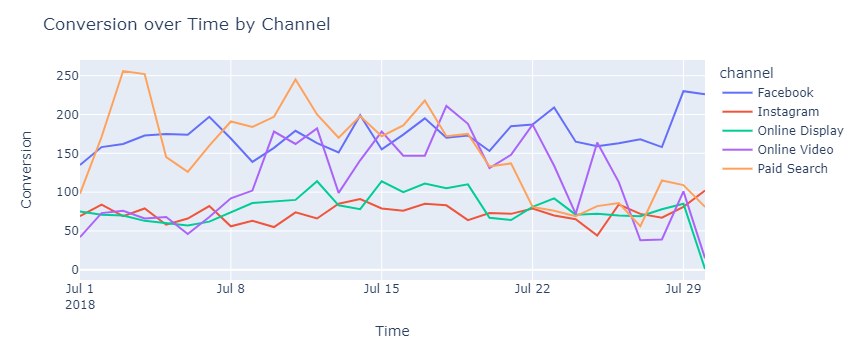

In [34]:
fig = px.line(conversions, x = 'time', y = 'conversion', color = 'channel')
fig.update_layout(title = 'Conversion over Time by Channel',
                  xaxis_title = 'Time',
                  yaxis_title = 'Conversion')
fig.show()

In [35]:
print('Total conversions: {}'.format(sum(data.conversion)))
print('Total conversion rate: {}%'.format(round(sum(data.conversion) / len(data)*100)))
print('Total value of conversions: ${}'.format(round(sum(data.conversion_value))))
print('Average conversion value: ${}'.format(round(sum(data.conversion_value) / sum(data.conversion))))

Total conversions: 17639
Total conversion rate: 3%
Total value of conversions: $110231
Average conversion value: $6
